In [ ]:
from google.colab import drive

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 6.5 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=1373b22480325a5876efda509d4a1d490ff1a729e6e558b6db852904e087f05f
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 10.8 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 216 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516313 sha256=71435bfeeba6c94c74231c3a9d6789db17691f6b442636821534a426569348ea
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 42 kB 851 kB/s 
     |████████████████████████████████| 9.5 MB 8.6 MB/s 
     |████████████████████████████████| 603 kB 50.9 MB/s 
     |████████████████████████████████| 930 kB 39.6 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Created wheel for validators: filename=validators-0.19.0-py3-none-any.whl size=19553 sha256=9ea259e9307c02be772bec892d5557b1e288f5b745673b1a0a71f04d360e9231
  Stored in directory: /root/.cache/pip/wheels/fe/5d/69/ff53a908b9f14fb7730a58fdede0fac4cdc99ef3624ec76d05
Successfully built validators


In [ ]:
data_dir = '.'

import os
import math
import imgaug
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf

import keras_ocr

dataset = keras_ocr.datasets.get_icdar_2013_detector_dataset(
    cache_dir='.',
    skip_illegible=False
)

Looking for ./icdar2013/Challenge2_Training_Task12_Images.zip
Looking for ./icdar2013/Challenge2_Training_Task2_GT.zip


In [ ]:
train, validation = sklearn.model_selection.train_test_split(
    dataset, train_size=0.8, random_state=42
)
augmenter = imgaug.augmenters.Sequential([
    imgaug.augmenters.Affine(
      scale=(1.0, 1.2),
      rotate=(-5, 5)
    ),
    imgaug.augmenters.GaussianBlur(sigma=(0, 0.5)),
    imgaug.augmenters.Multiply((0.8, 1.2), per_channel=0.2)
])
generator_kwargs = {'width': 640, 'height': 640}
training_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=train,
    augmenter=augmenter,
    **generator_kwargs
)
validation_image_generator = keras_ocr.datasets.get_detector_image_generator(
    labels=validation,
    **generator_kwargs
)

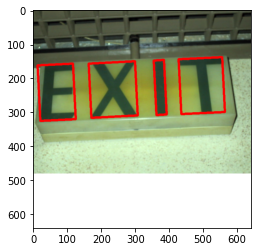

In [ ]:
image, lines, confidence = next(training_image_generator)
canvas = keras_ocr.tools.drawBoxes(image=image, boxes=lines, boxes_format='lines')
plt.imshow(canvas)

In [ ]:
detector = keras_ocr.detection.Detector()

batch_size = 1
training_generator, validation_generator = [
    detector.get_batch_generator(
        image_generator=image_generator, batch_size=batch_size
    ) for image_generator in
    [training_image_generator, validation_image_generator]
]
detector.model.fit_generator(
    generator=training_generator,
    steps_per_epoch=math.ceil(len(train) / batch_size),
    epochs=1000,
    workers=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5),
        tf.keras.callbacks.CSVLogger(os.path.join(data_dir, 'detector_icdar2013.csv')),
        tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(data_dir, '/content/drive/MyDrive/detector_icdar2013.h5'))
    ],
    validation_data=validation_generator,
    validation_steps=math.ceil(len(validation) / batch_size)
)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/1000
183/183 [==============================] - ETA: 0s - loss: 0.0127

/usr/local/lib/python3.7/dist-packages/keras_ocr/tools.py:580: RuntimeWarning: invalid value encountered in long_scalars
  rotation = np.arctan((tl[0] - bl[0]) / (tl[1] - bl[1]))


183/183 [==============================] - 199s 990ms/step - loss: 0.0127 - val_loss: 0.0158
Epoch 2/1000
183/183 [==============================] - 182s 993ms/step - loss: 0.0098 - val_loss: 0.0072
Epoch 3/1000
183/183 [==============================] - 181s 989ms/step - loss: 0.0103 - val_loss: 0.0121
Epoch 4/1000
183/183 [==============================] - 179s 981ms/step - loss: 0.0082 - val_loss: 0.0138
Epoch 5/1000
183/183 [==============================] - 178s 976ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 6/1000
183/183 [==============================] - 178s 976ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 7/1000
183/183 [==============================] - 179s 979ms/step - loss: 0.0052 - val_loss: 0.0068
Epoch 8/1000
183/183 [==============================] - 179s 979ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 9/1000
183/183 [==============================] - 180s 983ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 10/1000
183/183 [==============================] - 18